## Preparation

Loading the dataset about breast cancer:


*   radius (mean of distances from center to points on the perimeter)
*   texture (standard deviation of gray-scale values)

* perimeter

* area

* smoothness (local variation in radius lengths)

* compactness (perimeter^2 / area - 1.0)

* concavity (severity of concave portions of the contour)

* concave points (number of concave portions of the contour)

* symmetry

* fractal dimension (“coastline approximation” - 1)

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.simplefilter(action="ignore")

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.DESCR)



.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                            columns=np.append(cancer['feature_names'], ['target']))

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


## Data Inspection/Exploration

In [ ]:
df['target'].value_counts()


1.0    357
0.0    212
Name: target, dtype: int64

In [ ]:
# inspect the distribution of the target variable
# benign means gentle/not harmful, malignant means harmful
df.replace({'target': 0}, "malignant", inplace=True)
df.replace({'target': 1}, "benign", inplace=True)

# inspect the distribution

<Axes: xlabel='target', ylabel='Count'>

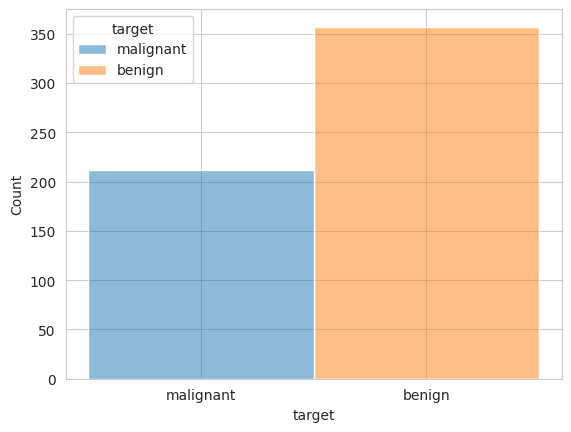

In [ ]:
sns.histplot(data=df, x='target', hue='target')

In [ ]:
#inspect the data and columns
# count number of empty values in each column
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [ ]:
#look at the data types to see if and which columns need to be encoded
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [ ]:
df.replace({'target': 'malignant'}, 1, inplace=True)
df.replace({'target': 'benign'}, 0, inplace=True)

<Axes: xlabel='target', ylabel='Count'>

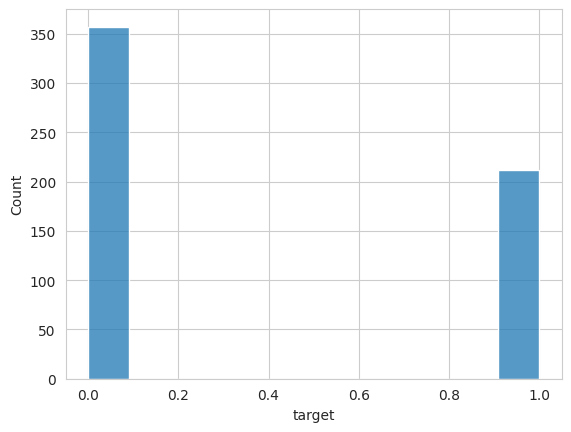

In [ ]:
import seaborn as sns

sns.histplot(data=df, x='target')

In [ ]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [ ]:
# make sure that in your target variable , malignant is encoded as 1 and benign as 0
#define X and y
target = 'target'
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']
X = df[features]
y = df[target]

In [ ]:
# from keras.utils import np_utils
# Prepare the target variable to have a 2 dim shape
# NO


## 1) Split the Data into Train/Test

In [ ]:
from sklearn.model_selection import train_test_split
# use random state 42

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [ ]:
# feature scaling - standardscaler
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test.max()

9.057115677415991

## Create Classifier

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_nn(num_input_features, hidden_dims: set[int], activation: str = None, last_layer_activation: str = None):
  model = Sequential()

  model.add(Dense(units=hidden_dims[0], input_dim=num_input_features,
                  # kernel_initializer='normal',
                  activation=activation))

  for i in range(1, len(hidden_dims) ):
    model.add(Dense(units=hidden_dims[i],
                    # kernel_initializer='normal',
                    activation=activation))

  model.add(Dense(units=1,
                  # kernel_initializer='normal',
                  activation=last_layer_activation))

  return model

In [ ]:
num_features = X_train.shape[1]


In [ ]:
# You have 2 Alternative ways of implementing a Binary Classification.
# For now, use output activation sigmoid, 1 node and binary_crossentropy loss. Your target array can therefore stay 1 dimensional
# implement a NN with 2 hiddenlayers, for you could use first hidden layer of size 15, second of size 6

model1 = build_nn(num_features, (15, 6), activation='relu', last_layer_activation='sigmoid')

In [ ]:
from tensorflow.keras.optimizers import Adam

#compile the model with the adam optimizer
model1.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
#show model summary
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 15)                465       
                                                                 
 dense_22 (Dense)            (None, 6)                 96        
                                                                 
 dense_23 (Dense)            (None, 1)                 7         
                                                                 
Total params: 568 (2.22 KB)
Trainable params: 568 (2.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# see if you can reproduce the parameters from input to hidden layer:
model1.count_params

#(dimension of W_1)
dim1 = X_train.shape[1] * 15 + 15
# first hidden to second hidden layer
#(dimension of W_2))
dim2 = 15 * 6 + 6
# second hidden to output layer
#(dimension of W_3 )
dim3 = 6 * 1 + 1

print(f'{dim1} {dim2} {dim3}')

465 96 7


In [ ]:
#fit the model, you can use 100 epochs for start
model1.fit(X_train, y_train, epochs=100, verbose=2, validation_split=0.25)

Epoch 1/100
10/10 - 2s - loss: 0.7019 - val_loss: 0.6803 - 2s/epoch - 232ms/step
Epoch 2/100
10/10 - 0s - loss: 0.6596 - val_loss: 0.6408 - 104ms/epoch - 10ms/step
Epoch 3/100
10/10 - 0s - loss: 0.6216 - val_loss: 0.5993 - 112ms/epoch - 11ms/step
Epoch 4/100
10/10 - 0s - loss: 0.5787 - val_loss: 0.5553 - 119ms/epoch - 12ms/step
Epoch 5/100
10/10 - 0s - loss: 0.5305 - val_loss: 0.5086 - 110ms/epoch - 11ms/step
Epoch 6/100
10/10 - 0s - loss: 0.4810 - val_loss: 0.4645 - 97ms/epoch - 10ms/step
Epoch 7/100
10/10 - 0s - loss: 0.4353 - val_loss: 0.4236 - 85ms/epoch - 8ms/step
Epoch 8/100
10/10 - 0s - loss: 0.3922 - val_loss: 0.3869 - 93ms/epoch - 9ms/step
Epoch 9/100
10/10 - 0s - loss: 0.3513 - val_loss: 0.3539 - 92ms/epoch - 9ms/step
Epoch 10/100
10/10 - 0s - loss: 0.3151 - val_loss: 0.3231 - 112ms/epoch - 11ms/step
Epoch 11/100
10/10 - 0s - loss: 0.2808 - val_loss: 0.2955 - 105ms/epoch - 11ms/step
Epoch 12/100
10/10 - 0s - loss: 0.2510 - val_loss: 0.2709 - 119ms/epoch - 12ms/step
Epoch 13/1

In [ ]:
# def evaluate_model(model, X_train, X_test, y_train, y_test):
#   score_train = model.evaluate(X_train, y_train, verbose=0)
#   score_test = model.evaluate(X_test, y_test, verbose=0)

#   print(f'Binary crossentropy, train {score_train}, test {score_test}')
score_train = model1.evaluate(X_train, y_train, verbose=0)
score_test = model1.evaluate(X_test, y_test, verbose=0)

print(f'Binary crossentropy, train {score_train}, test {score_test}')

Binary crossentropy, train 0.038690343499183655, test 0.07025522738695145


The metrics that *evaluate()* gives us depend on the input argument *metrics* that we used when setting up our NN. Keras knows several other metrics (see [Keras doc. for details](https://keras.io/metrics/)) but not all known metrics are supported for training the NN. Between, you can also extend the set of metrics with customer metrics (see this [example](https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/) if interested.).

We also have access to model performance results via the result of *model.fit()*, that is our variable *story*.

In [ ]:
# Now install the tensorflow addons and define the following metrics. You have AUC, Precision and Recall in Keras Metrics but F1 you will need to get it from tensorflow addons


In [ ]:
!pip install tensorflow-addons



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 7.4 MB/s eta 0:00:00


In [ ]:
import keras
import tensorflow as tf
import tensorflow_addons as tfa
# see a list of possible metrics you could use
metrics = ['accuracy',
    #keras.metrics.Precision(),
    #keras.metrics.Recall(),
    keras.metrics.AUC(),
    tfa.metrics.F1Score(
        name="f1_micro",
        average="micro",
        num_classes=1,
        threshold=0.5,
    ),
    #tfa.metrics.F1Score(
    #    name="f1_weighted",
    #    average="weighted",
    #    num_classes=1,
    #    threshold=0.5,
    #),
]

In [ ]:
# rerun the mmodel with the above metrics list as metrics in your complie call
model2 = build_nn(num_features, (15, 6), activation='relu', last_layer_activation='sigmoid')
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics)
# fit the model and save it into story
story = model2.fit(X_train, y_train, epochs=100, verbose=0, validation_split=0.25)

In [ ]:
# print Test Loss and Accuracy and plot the history. You can use the show_history plot function from the LiveCoding
story.history.keys()

dict_keys(['loss', 'accuracy', 'auc', 'f1_micro', 'val_loss', 'val_accuracy', 'val_auc', 'val_f1_micro'])

In [ ]:
metrics_train = model2.evaluate(X_train, y_train, verbose=0)
metrics_test = model2.evaluate(X_test, y_test, verbose=0)

print(f'Binary crossentropy, train {round(metrics_train[0], 2)}, test {round(metrics_test[0], 2)}')
print(f'Accuracy, train {round(metrics_train[1], 2)}, test {round(metrics_test[1], 2)}')

Binary crossentropy, train 0.04, test 0.05
Accuracy, train 0.99, test 0.99


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

def plot_metrics(story):
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))
  ax1 = axes[0]

  loss_over_epoch_train = story.history['loss']
  sns.lineplot(loss_over_epoch_train, label='Loss on train data', ax=ax1)

  loss_over_epoch_test = story.history['val_loss']
  sns.lineplot(loss_over_epoch_test, label='Loss on validation data', ax=ax1)

  plt.xlabel('Epoch')
  plt.ylabel('Loss')

  ax2 = axes[1]

  sns.lineplot(story.history['accuracy'], label='Accuracy on train data', ax=ax2)
  sns.lineplot(story.history['val_accuracy'], label='Accuracy on validation data', ax=ax2)

  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')

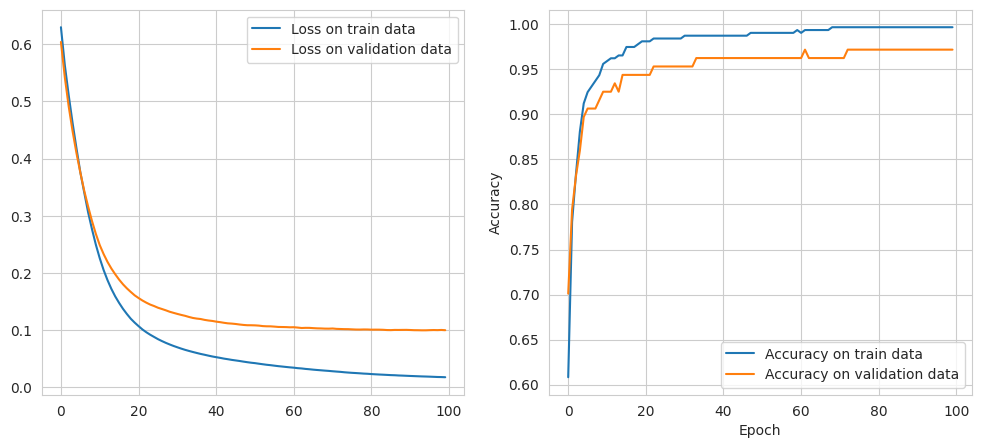

In [ ]:
plot_metrics(story)


[Check out this link](https://towardsdatascience.com/dont-overfit-how-to-prevent-overfitting-in-your-deep-learning-models-63274e552323)

```
# This is formatted as code
```



Typically validation loss should be similar to but slightly higher than training loss.
As long as validation loss is lower than or even equal to training loss one should keep doing more training.
If training loss is reducing without increase in validation loss then again keep doing more training.
If validation loss starts increasing then it is time to stop.
Some over-fitting is nearly always a good thing. All that matters in the end is: is the validation loss as low as you can get it!

If overall accuracy still not acceptable then review mistakes model is making and think of what can one change:
More data? More / different data augmentations? Different architecture?

In [ ]:
# Compute predictions of X_test
y_test_pred = model2.predict(X_test)

5/5 [==============================] - 0s 6ms/step


In [ ]:
y_predicted_classes = [1 if prob[0] >= 0.5 else 0 for prob in y_test_pred]

In [ ]:
# Finding the most probable class
import numpy as np

np.sort(y_test_pred)
y_test_pred = y_test_pred.reshape(-1)
list(np.sort(y_test_pred)[::-1][:10])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [ ]:
# print the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def display_confusion_matrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  cm_proportions = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  ConfusionMatrixDisplay(confusion_matrix=cm_proportions).plot()

[[88  1]
 [ 1 53]]


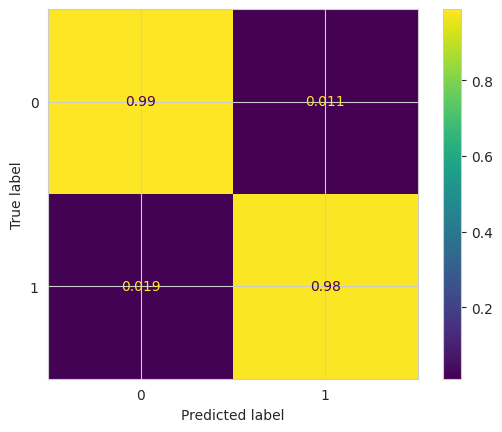

In [ ]:
display_confusion_matrix(y_test, y_predicted_classes)

In [ ]:
 #print calssification report

print(classification_report(y_test, y_predicted_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        89
           1       0.98      0.98      0.98        54

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



# OPTION 2
Lets implement the same model with softmax output activation and 2 nodes. REMEMBER, the binary classification case is a special case of the multiclass classification case with 2 classes. so the softmax function with only 2 classes will give the sigmoid function.
MEaning, when you have a binary classification problem, have 2 options
1.  output activation sigmoid, 1 node and binary_crossentropy loss
2. output activation softmax, 2 nodes and categorical_crossentropy loss

In [ ]:
# YOu need to prepare the Target Variable
# if you use categorical crossentropy loss, you have to reshape the target variable to the dimension of the classes,
# ie. OneHot encode the Target
# Note: you can leave the target as normal integers (INteger ENcoding), but then you have to use 'sparse_categorical_crossentropy' loss